# **Calories Burnt Prediction - Machine Learning Pipeline**


# 1. Data Loading

In [40]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import joblib

In [41]:
# Load datasets
calories = pd.read_csv("calories.csv")
exercise = pd.read_csv("exercise.csv")

# 2. Data Exploration

In [42]:
# Merge datasets on User_ID
data = pd.merge(calories, exercise, on='User_ID')
print("Dataset Shape:", data.shape)
data.head()

Dataset Shape: (15000, 9)


,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8


# 3. Data Visualization

In [43]:
sns.set(style="whitegrid", palette="pastel")

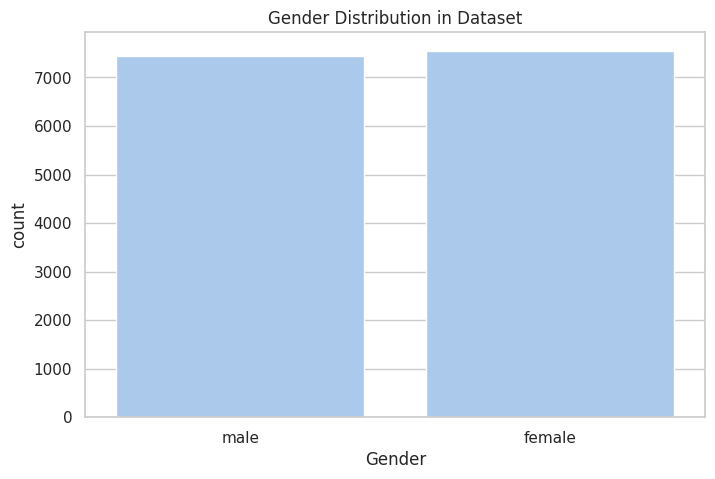

In [44]:
# Gender distribution
plt.figure(figsize=(8,5))
sns.countplot(x='Gender', data=data)
plt.title("Gender Distribution in Dataset")
plt.show()

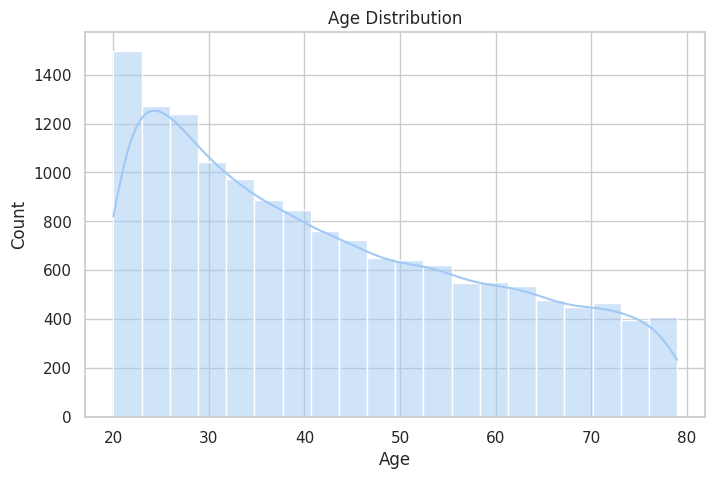

In [45]:
# Age distribution
plt.figure(figsize=(8,5))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

# 4. Feature Engineering

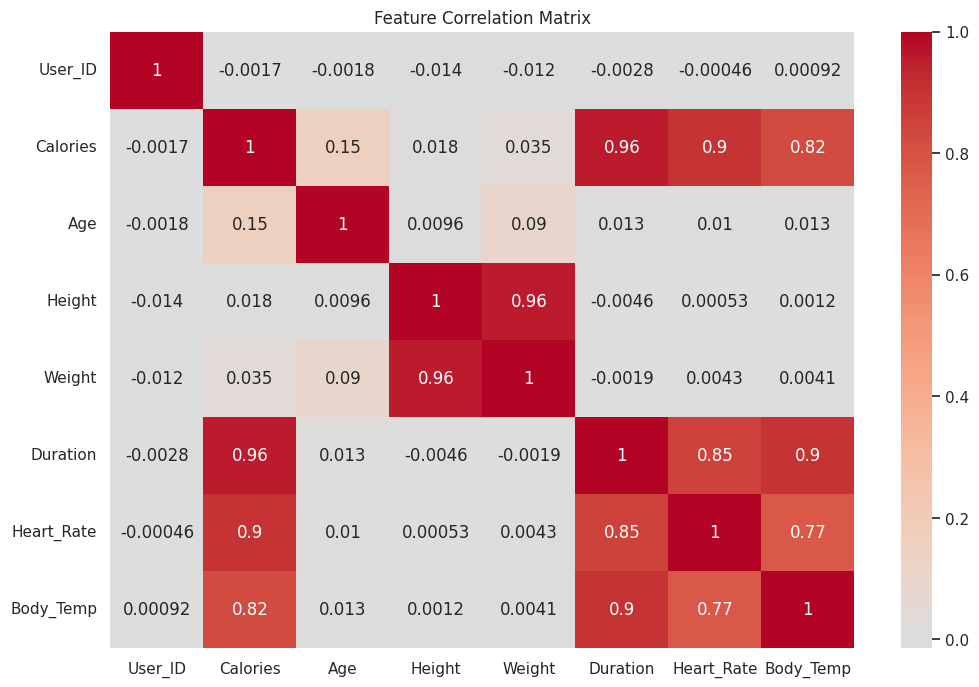

In [46]:
# Correlation analysis
plt.figure(figsize=(12,8))
corr_matrix = data.select_dtypes(include=['number']).corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Feature Correlation Matrix")
plt.show()

In [47]:
# Prepare features and target
X = data.drop(columns=['User_ID', 'Calories'])
y = data['Calories']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Model Pipeline

In [48]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('ordinal', OrdinalEncoder(), ['Gender']),
    ('num', StandardScaler(), ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp'])
])

In [49]:
# XGBoost model
model = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(
        n_estimators=100,
        max_depth=6,
        random_state=42,
        tree_method='hist',
        device='cpu',
        verbosity=0         # Suppresses unnecessary warnings
    ))
])

In [50]:
# Training
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ordinal', OrdinalEncoder(),
                                                  ['Gender']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'Duration', 'Heart_Rate',
                                                   'Body_Temp'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device='cpu',
                              early_stop...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

# 6. Model Evaluation

In [51]:
# Make predictions
y_pred = model.predict(X_test)

In [52]:
# Calculate metrics
print("Model Performance:")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.4f} kcal")

Model Performance:
R² Score: 0.9989
Mean Absolute Error: 1.4981 kcal


In [53]:
# Cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=kfold, scoring='r2')
print(f"\nCross-Validation R²: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")


Cross-Validation R²: 0.9989 (±0.0001)


# 7. Model Export

In [54]:
# Save model in joblib format
joblib.dump(model, 'pipeline_model.joblib', compress=3)

['pipeline_model.joblib']

In [55]:
# Generate requirements file
with open('requirements.txt', 'w') as f:
    f.write("""xgboost==1.7.6
scikit-learn==1.3.2
joblib==1.3.2
pandas==2.1.3
numpy==1.24.4""")
print("Model saved successfully as 'pipeline_model.joblib'")

Model saved successfully as 'pipeline_model.joblib'
